# Clustering (Unsupervised)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = 'unsupervised_data.csv'
data = pd.read_csv(data_path)
X = data.drop(columns=['ID']).values

Randomly initialize k centroids from the data.

In [5]:
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

Assign each data point to the nearest centroid.

In [7]:
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)

Update centroids as the mean of points in each cluster

In [9]:
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            new_centroids.append(np.zeros(X.shape[1]))
    return np.array(new_centroids)

K-Means Clustering algorithm

In [11]:
def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

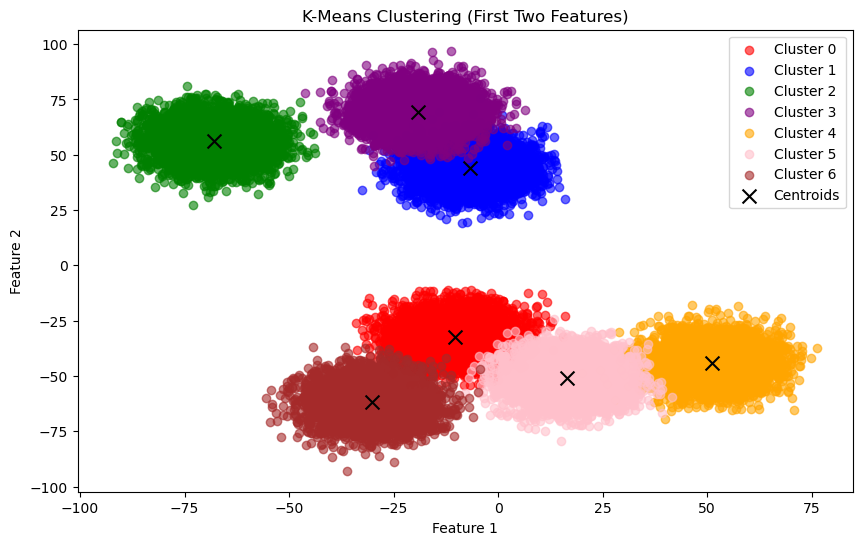

In [12]:
k = 7

centroids, clusters = k_means(X, k)

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange','pink','brown']

for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i}', alpha=0.6)

plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering (First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [13]:
data['Cluster'] = clusters
output_path = 'k_means_clusters.csv'
data.to_csv(output_path, index=False)

print(f"Cluster assignments saved to {output_path}")

Cluster assignments saved to k_means_clusters.csv
